<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/DM_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/1.1 cluster_blob.csv')

In [ ]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


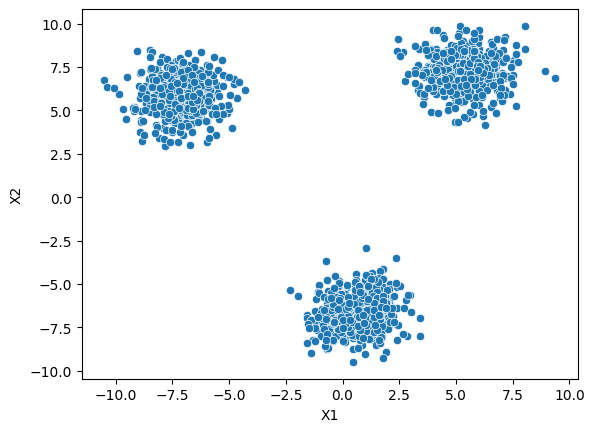

In [ ]:
sns.scatterplot(data=dataset,x='X1',y='X2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=KMeans(n_clusters=3,random_state=42)
labels=model.fit_predict(dataset)



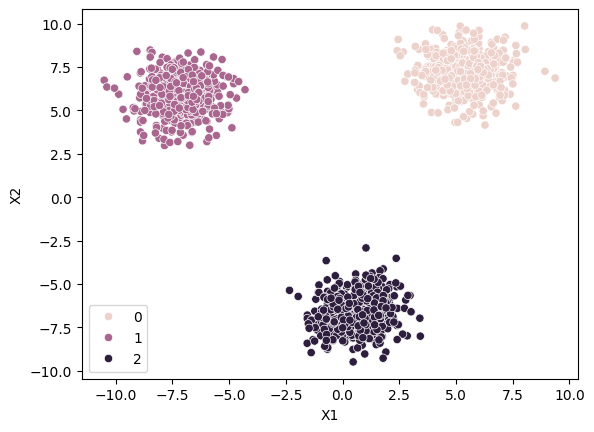

In [ ]:
sns.scatterplot(data=dataset,x='X1',y='X2',hue=model.labels_)
plt.show()

In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
model =KMedoids(n_clusters=3,random_state=42)
labels=model.fit_predict(dataset)

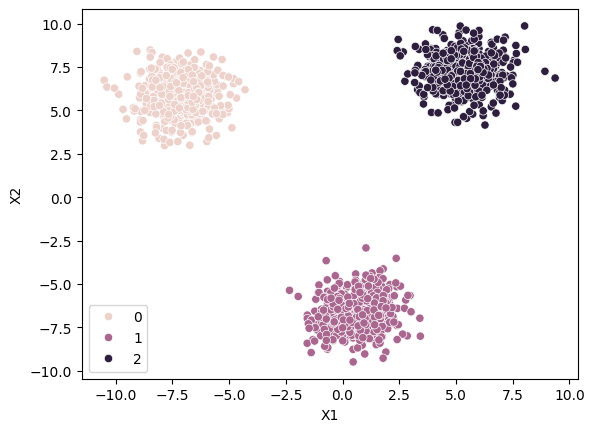

In [ ]:
sns.scatterplot(data=dataset,x='X1',y='X2',hue=model.labels_)
plt.show()

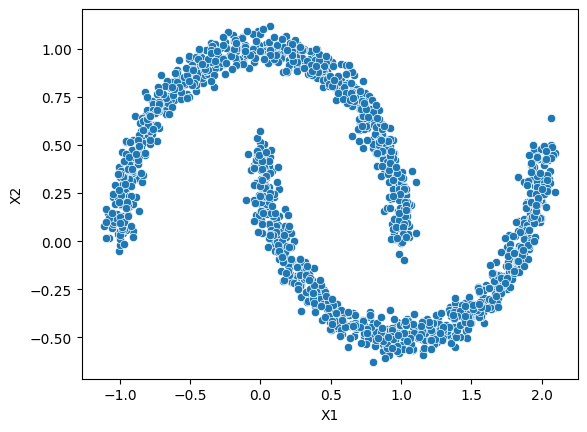

In [ ]:
moon=pd.read_csv('/content/1.2 cluster_moon.csv')
sns.scatterplot(data=moon,x='X1',y='X2')
plt.show()


In [ ]:
model=KMeans(n_clusters=2,random_state=42)
labels=model.fit_predict(moon)

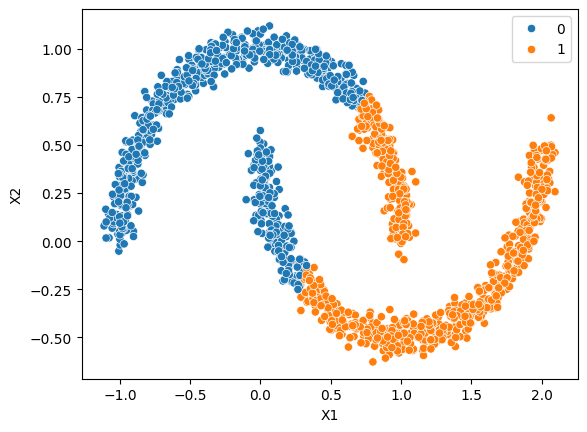

In [ ]:
sns.scatterplot(data=moon,x='X1',y='X2',hue=model.labels_)
plt.show()

In [ ]:

model=KMedoids(n_clusters=2,random_state=42)
labels=model.fit_predict(moon)

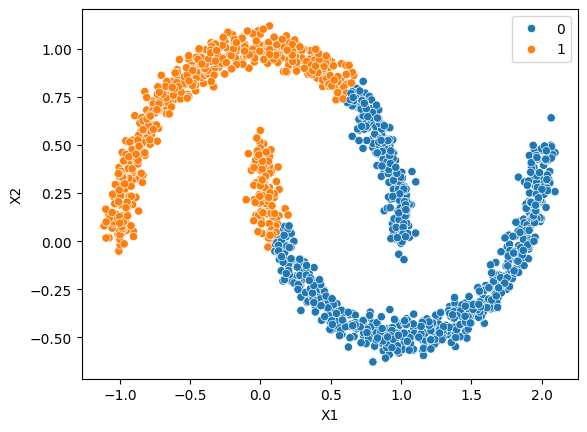

In [ ]:
sns.scatterplot(data=moon,x='X1',y='X2',hue=model.labels_)
plt.show()

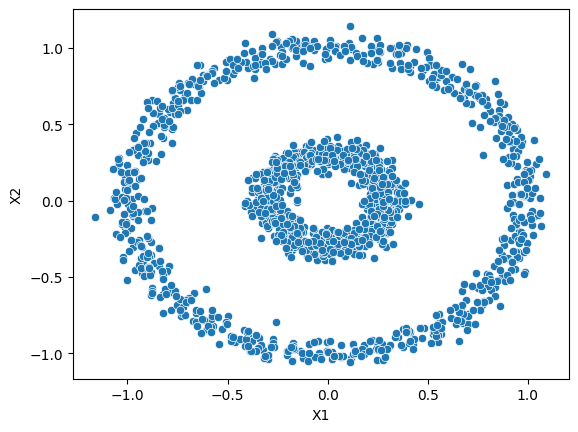

In [ ]:
circle=pd.read_csv('/content/1.3 cluster_circles.csv')
sns.scatterplot(data=circle,x='X1',y='X2')
plt.show()

In [ ]:
model=KMeans(n_clusters=2,random_state=42)
labels=model.fit_predict(circle)

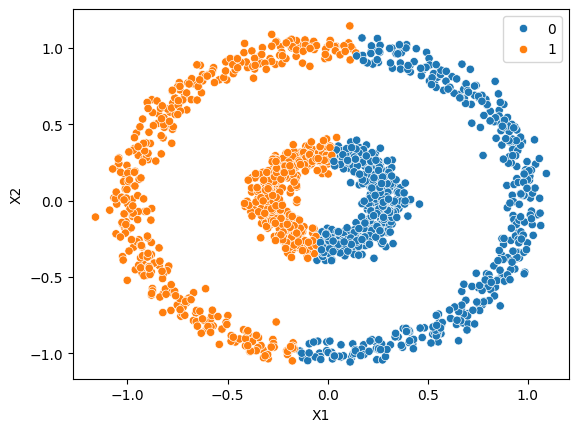

In [ ]:
sns.scatterplot(data=circle,x='X1',y='X2',hue=model.labels_)
plt.show()

In [ ]:
model=KMedoids(n_clusters=2,random_state=42)
labels=model.fit_predict(circle)

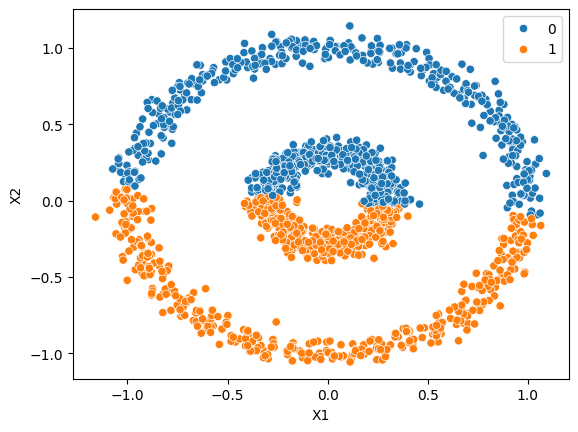

In [ ]:
sns.scatterplot(data=circle,x='X1',y='X2',hue=model.labels_)
plt.show()

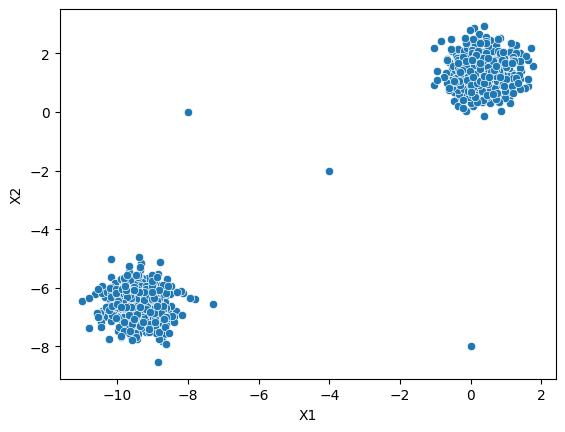

In [ ]:
two_blobs=pd.read_csv('/content/1.4 cluster_two_blob_outliers.csv')
sns.scatterplot(data=two_blobs,x='X1',y='X2')
plt.show()

In [ ]:
model=KMeans(n_clusters=3,random_state=42)
labels=model.fit_predict(two_blobs)

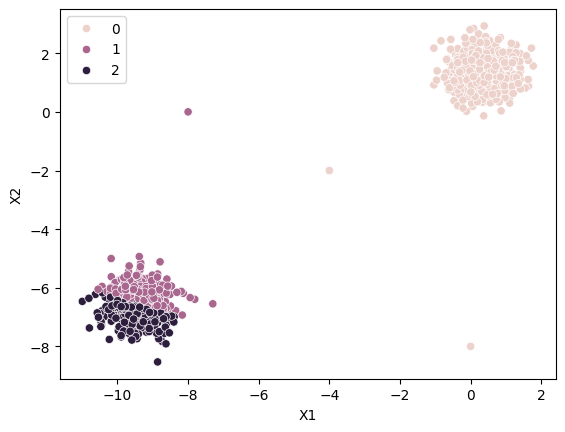

In [ ]:

sns.scatterplot(data=two_blobs,x='X1',y='X2',hue=model.labels_)
plt.show()

In [ ]:
model=KMedoids(n_clusters=3,random_state=42)
labels=model.fit_predict(two_blobs)

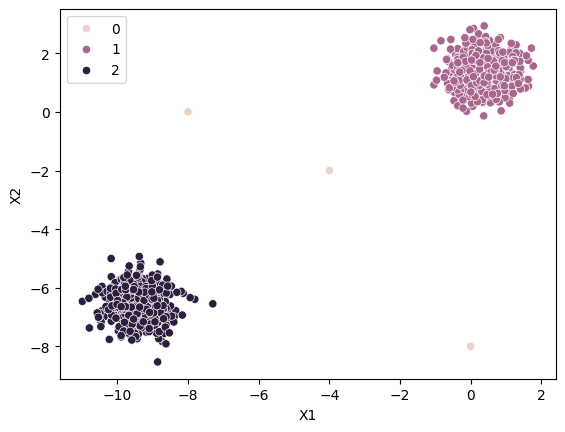

In [ ]:
sns.scatterplot(data=two_blobs,x='X1',y='X2',hue=model.labels_)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

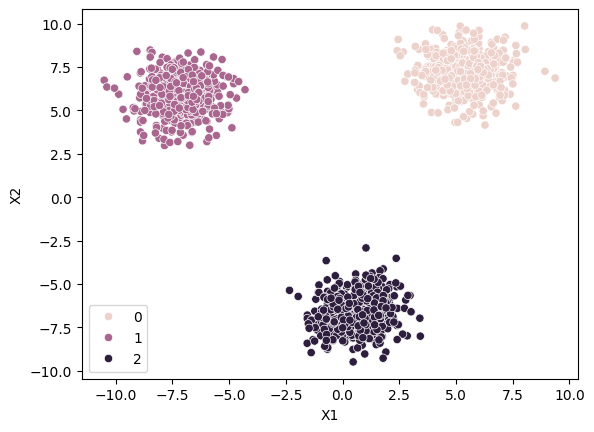

In [ ]:
model=DBSCAN(eps=1.5,min_samples=5)
labels=model.fit_predict(dataset[['X1','X2']])
sns.scatterplot(data=dataset,x='X1',y='X2',hue=labels)
plt.show()

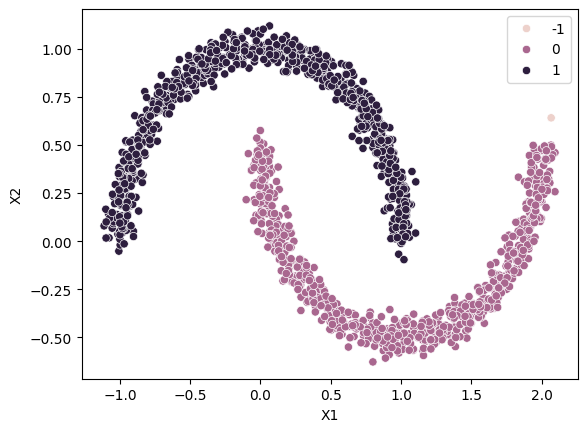

In [ ]:
model=DBSCAN(eps=0.1,min_samples=3)
labels1=model.fit_predict(moon[['X1','X2']])
sns.scatterplot(data=moon,x='X1',y='X2',hue=labels1)
plt.show()

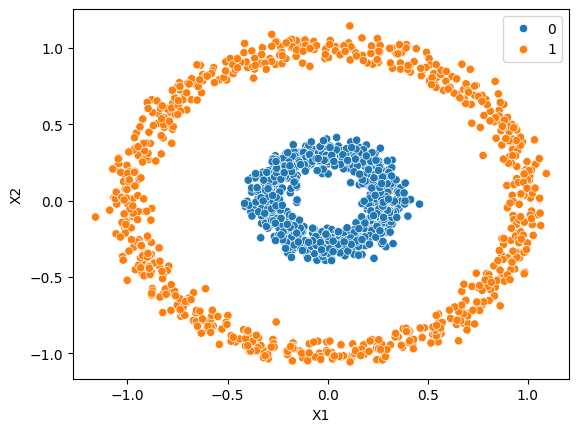

In [ ]:
model=DBSCAN(eps=0.3,min_samples=3)
labels2=model.fit_predict(circle[['X1','X2']])
sns.scatterplot(data=circle,x='X1',y='X2',hue=labels2)
plt.show()


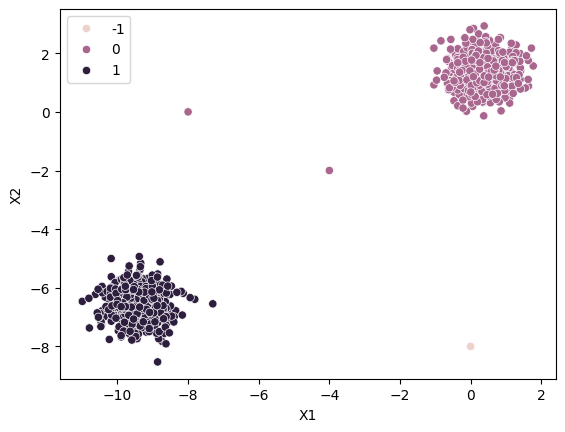

In [ ]:
model=DBSCAN(eps=4.54,min_samples=3)
labels3=model.fit_predict(two_blobs[['X1','X2']])
sns.scatterplot(data=two_blobs,x='X1',y='X2',hue=labels3)
plt.show()

**EPS VALUE**

In [ ]:
# for best eps value

outlier_percent={}
num_of_outlier={}

rng=np.linspace(0.001,30,100)

for eps in rng:
  model=DBSCAN(eps=eps,min_samples=5)
  labels=model.fit_predict(two_blobs[['X1','X2']])
  #Total outlier found
  num_of_outlier[eps]=len(labels[labels==-1])


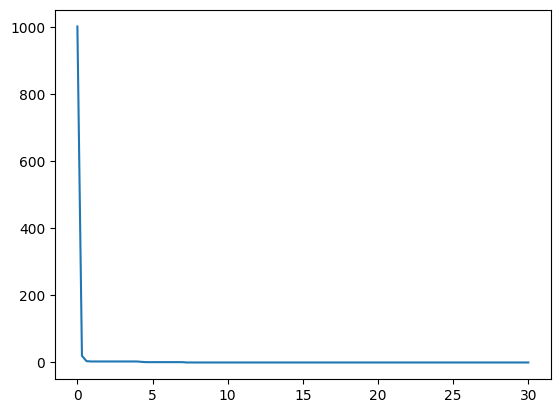

In [ ]:
sns.lineplot(x=rng,y=num_of_outlier.values())
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

# Dictionaries to store outlier count and percentage for each eps value
num_of_outlier = {}
outlier_percent = {}

# Assuming two_blobs is your DataFrame with columns 'X1' and 'X2'
total_points = len(two_blobs)

rng = np.linspace(0.001, 30, 100)

for eps in rng:
    model = DBSCAN(eps=eps, min_samples=5)
    labels = model.fit_predict(two_blobs[['X1', 'X2']])
    # Count total outliers (noise points)
    count_outliers = len(labels[labels == -1])
    num_of_outlier[eps] = count_outliers
    outlier_percent[eps] = (count_outliers / total_points) * 100

# Example: Print out some results
for eps in sorted(num_of_outlier)[:5]:  # just show first 5 eps values
    print(f"eps: {eps:.3f} -> Outliers: {num_of_outlier[eps]}, Percentage: {outlier_percent[eps]:.2f}%")


eps: 0.001 -> Outliers: 1003, Percentage: 100.00%
eps: 0.304 -> Outliers: 20, Percentage: 1.99%
eps: 0.607 -> Outliers: 4, Percentage: 0.40%
eps: 0.910 -> Outliers: 3, Percentage: 0.30%
eps: 1.213 -> Outliers: 3, Percentage: 0.30%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import itertools


df = pd.read_csv("/content/1.1 cluster_blob.csv")
X = df[['X1', 'X2']].values


eps_values = np.linspace(0.1, 10, 50)
min_samples_values = range(3, 11)

best_score = -1
best_params = {}

# Grid search over all combinations of eps and min_samples
for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Exclude cases where DBSCAN finds only noise or a single cluster (silhouette score is undefined)
    unique_labels = set(labels) - {-1}
    if len(unique_labels) < 2:
        continue

    score = silhouette_score(X, labels)

    # print(f"eps: {eps:.2f}, min_samples: {min_samples}, silhouette score: {score:.3f}")

    if score > best_score:
        best_score = score
        best_params['eps'] = eps
        best_params['min_samples'] = min_samples


print("Optimal Parameters Found:")
print("eps =", best_params['eps'])
print("min_samples =", best_params['min_samples'])
print("Best Silhouette Score =", best_score)


Optimal Parameters Found:
eps = 1.5142857142857145
min_samples = 3
Best Silhouette Score = 0.8625486425630479


In [ ]:
df = pd.read_csv("/content/1.2 cluster_moon.csv")
X = df[['X1', 'X2']].values

eps_values = np.linspace(0.1, 10, 50)
min_samples_values = range(3, 11)

best_score = -1
best_params = {}

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    unique_labels = set(labels) - {-1}
    if len(unique_labels) < 2:
        continue
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params['eps'] = eps
        best_params['min_samples'] = min_samples


print("Optimal Parameters Found:")
print("eps =", best_params['eps'])
print("min_samples =", best_params['min_samples'])
print("Best Silhouette Score =", best_score)


Optimal Parameters Found:
eps = 0.1
min_samples = 3
Best Silhouette Score = 0.19200412734155878


In [ ]:
df = pd.read_csv("/content/1.3 cluster_circles.csv")
X = df[['X1', 'X2']].values

eps_values = np.linspace(0.1, 10, 50)
min_samples_values = range(3, 11)

best_score = -1
best_params = {}

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    unique_labels = set(labels) - {-1}
    if len(unique_labels) < 2:
        continue
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params['eps'] = eps
        best_params['min_samples'] = min_samples


print("Optimal Parameters Found:")
print("eps =", best_params['eps'])
print("min_samples =", best_params['min_samples'])
print("Best Silhouette Score =", best_score)


Optimal Parameters Found:
eps = 0.3020408163265306
min_samples = 3
Best Silhouette Score = 0.20829174427109967


In [ ]:
df = pd.read_csv('/content/1.4 cluster_two_blob_outliers.csv')
X = df[['X1', 'X2']].values

eps_values = np.linspace(0.1, 10, 50)
min_samples_values = range(3, 11)

best_score = -1
best_params = {}

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    unique_labels = set(labels) - {-1}
    if len(unique_labels) < 2:
        continue
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params['eps'] = eps
        best_params['min_samples'] = min_samples


print("Optimal Parameters Found:")
print("eps =", best_params['eps'])
print("min_samples =", best_params['min_samples'])
print("Best Silhouette Score =", best_score)


Optimal Parameters Found:
eps = 4.544897959183674
min_samples = 3
Best Silhouette Score = 0.8983019306390622
